<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-time-signal" data-toc-modified-id="Import-time-signal-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import time signal</a></span><ul class="toc-item"><li><span><a href="#Load-signal-from-.wav-file" data-toc-modified-id="Load-signal-from-.wav-file-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load signal from .wav file</a></span></li><li><span><a href="#Load-signal-from-a-.mat-file" data-toc-modified-id="Load-signal-from-a-.mat-file-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Load signal from a .mat file</a></span></li><li><span><a href="#Load-signal-from-a-.uff-file" data-toc-modified-id="Load-signal-from-a-.uff-file-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Load signal from a .uff file</a></span></li></ul></li><li><span><a href="#Compute-nth-octave-band-spectrum" data-toc-modified-id="Compute-nth-octave-band-spectrum-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Compute nth octave band spectrum</a></span></li></ul></div>

# Basic operations

## Import time signal

In MOSQITO, time signals from .wav, .mat and .uff files can be loaded. The following commands are used to import the "load" function.

In [1]:
# Add MOSQITO to the Python path
import sys
sys.path.append('..')

# To get inline plots (specific to Jupyter notebook)
%matplotlib notebook

# Import numpy
import numpy as np
# Import plot function
import matplotlib.pyplot as plt
# Import load function
from mosqito.utils import load

# Import MOSQITO color sheme [Optional]
from mosqito import COLORS

### Load signal from .wav file
You can use any .wav file to perform the tutorial or you can download the [woodpecker audio recording](../validations/sq_metrics/loudness_zwtv/input/ISO_532-1/Annex%20B.5/Test%20signal%2024%20%28woodpecker%29.wav) that is one of the validation signals delivered with the ISO 532-1 standard. To load a signal from a .wav file, 2 input arguments are needed :
 - the file path,
 - a calibration factor in [Pa/FS]

For the calibration of the WAVE files, the ISO 532-1 standard specifies that 0 dB (relative to full scale) shall correspond to a sound pressure level of 100 dBSPL. 100 dBSPL being equivalent to 2 Pa_rms or $2\sqrt(2)$ Pa_peak, the calibration factor shall be set to $2\sqrt(2)$ [Pa/FS].

Note that only the first channel of mutlichannels files will be loaded.

<IPython.core.display.Javascript object>


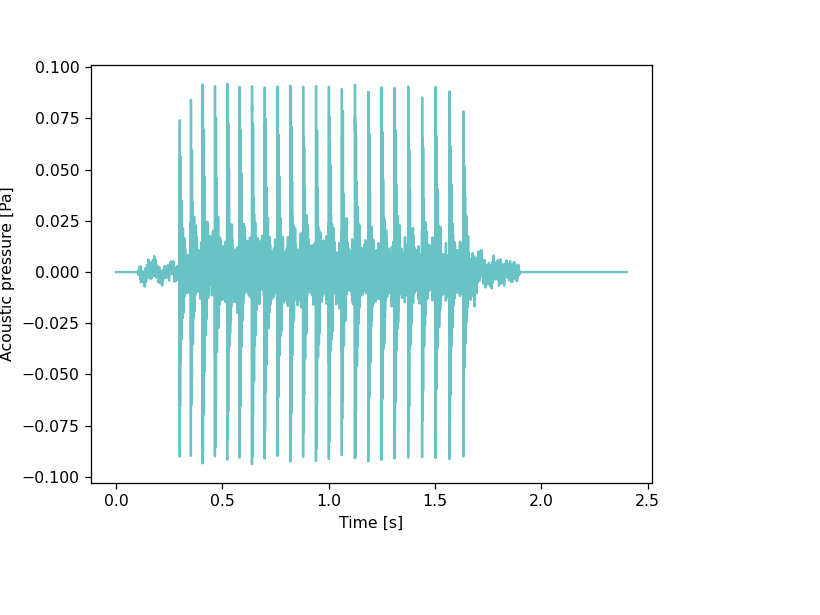

Text(0, 0.5, 'Acoustic pressure [Pa]')

In [2]:
# define the path to the wav file (to be replaced by your own path)
file_path = "../validations/sq_metrics/loudness_zwtv/input/ISO_532-1/Annex B.5/Test signal 24 (woodpecker).wav"
# load signal
sig_wav, fs_wav = load(file_path, wav_calib=2 * 2 **0.5)
# plot signal
t_wav = np.linspace(0, (len(sig_wav) - 1) / fs_wav, len(sig_wav))
plt.figure(1)
plt.plot(t_wav, sig_wav, color=COLORS[0])
plt.xlabel('Time [s]')
plt.ylabel('Acoustic pressure [Pa]')

### Load signal from a .mat file
You can use any .mat file to perform the tutorial or you can download the [noise signal](../tests/input/noise_1Pa_RMS.mat) from MOSQITO. To load the signal, 3 input arguments are needed :
 - the file path,
 - the name of the time signal matlab variable
 - the name of the sampling frequency matlab variable

[Info] Signal resampled to 48 kHz to allow calculation.


<IPython.core.display.Javascript object>


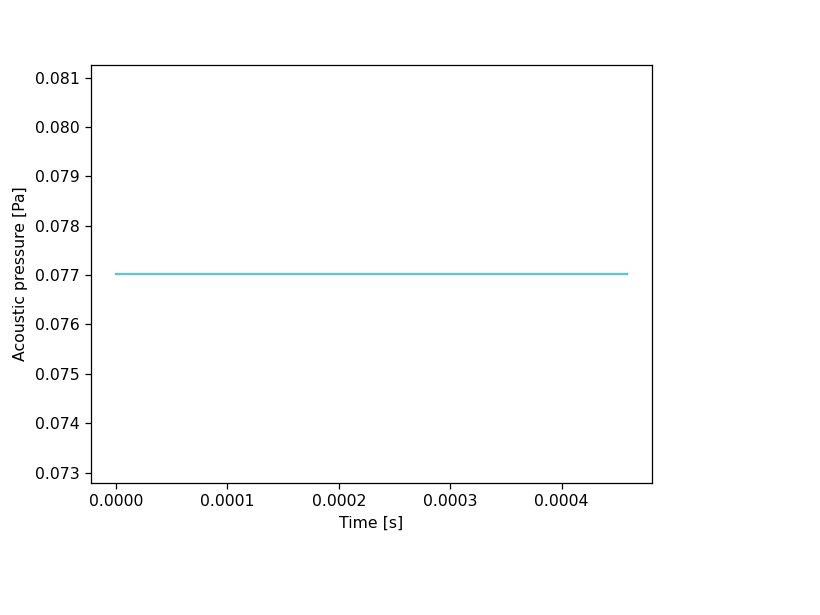

Text(0, 0.5, 'Acoustic pressure [Pa]')

In [3]:
# define the path to the mat file (to be replaced by your own path)
file_path = "../tests/input/noise_1Pa_RMS.mat"
# load signal
sig_mat, fs_mat = load(file_path, mat_signal="signal", mat_fs="fs")
# plot signal
t_mat = np.linspace(0, (len(sig_mat) - 1) / fs_mat, len(sig_mat))
plt.figure(2)
plt.plot(t_mat, sig_mat, color=COLORS[0])
plt.xlabel('Time [s]')
plt.ylabel('Acoustic pressure [Pa]')

### Load signal from a .uff file
You can use any .mat file to perform the tutorial or you can download the [noise signal](../tests/input/noise_1Pa_RMS.uff) from MOSQITO. To load the signal, 1 input arguments is needed :
 - the file path

[Info] Signal resampled to 48 kHz to allow calculation.


<IPython.core.display.Javascript object>


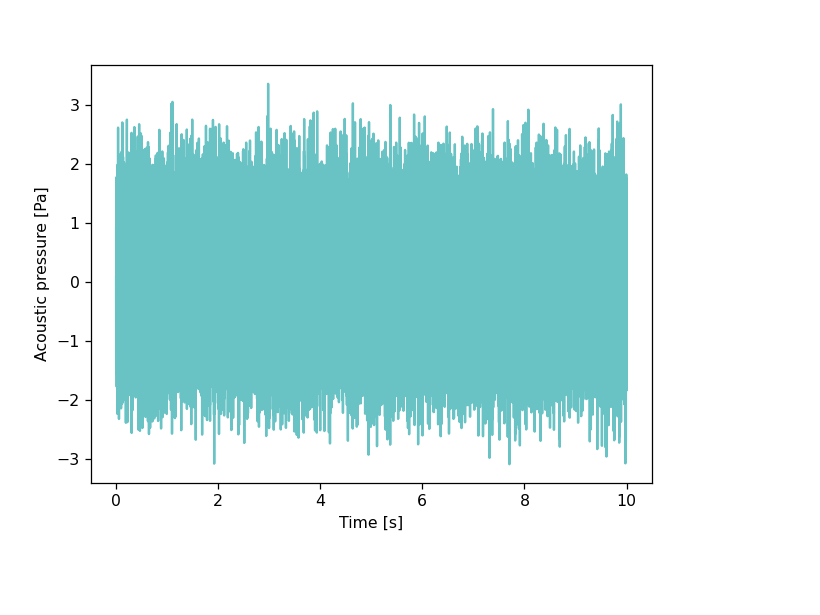

Text(0, 0.5, 'Acoustic pressure [Pa]')

In [4]:
# define the path to the uff file (to be replaced by your own path)
file_path = "../tests/input/noise_1Pa_RMS.uff"
# load signal
sig_uff, fs_uff = load(file_path)
# plot signal
t_uff = np.linspace(0, (len(sig_uff) - 1) / fs_uff, len(sig_uff))
plt.figure(3)
plt.plot(t_uff, sig_uff, color=COLORS[0])
plt.xlabel('Time [s]')
plt.ylabel('Acoustic pressure [Pa]')

## Compute nth octave band spectrum

The nth octave band spectrum of a signal can be computed by using the noct_spectrum function. The syntax is detailed below.

<IPython.core.display.Javascript object>


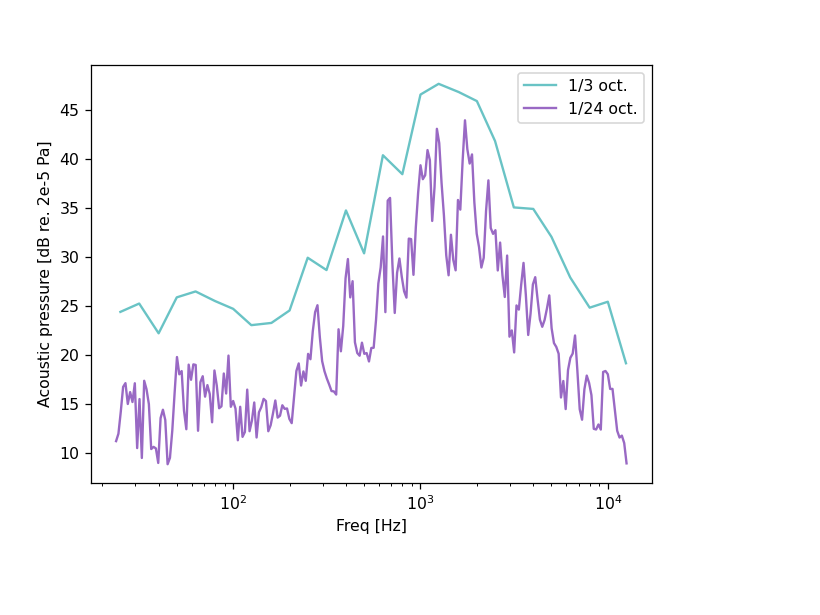

Text(0, 0.5, 'Acoustic pressure [dB re. 2e-5 Pa]')

In [5]:
# Load function
from mosqito.sound_level_meter import noct_spectrum

# Compute third octave band spectrum
spec_3, freq_3 = noct_spectrum(sig_wav, fs_wav, fmin=24, fmax=12600, n=3)

# Compute 24th octave band spectrum
spec_24, freq_24 = noct_spectrum(sig_wav, fs_wav, fmin=24, fmax=12600, n=24)

# plot
plt.figure(4)
plt.semilogx(freq_3, 20*np.log10(spec_3/2e-5), label="1/3 oct.", color=COLORS[0])
plt.semilogx(freq_24, 20*np.log10(spec_24/2e-5), label="1/24 oct.", color=COLORS[1])
plt.legend()
plt.xlabel('Freq [Hz]')
plt.ylabel('Acoustic pressure [dB re. 2e-5 Pa]')

---

In [6]:
from datetime import date
print("Tutorial generation date:", date.today().strftime("%B %d, %Y"))

Tutorial generation date: February 23, 2022
